<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
%matplotlib inline

First, I'm importing the individual CSV files into Python in order to combine them. There was some trouble importing some of the files into Python, but after trying several times, I was able to import them successfully by defining the file encoding.

In [2]:
CAvideos = pd.read_csv('Trending Youtube Video Statistics\CAvideos.csv')
DEvideos = pd.read_csv('Trending Youtube Video Statistics\DEvideos.csv')
FRvideos = pd.read_csv('Trending Youtube Video Statistics\FRvideos.csv')
GBvideos = pd.read_csv('Trending Youtube Video Statistics\GBvideos.csv')
INvideos = pd.read_csv('Trending Youtube Video Statistics\INvideos.csv')
JPvideos = pd.read_csv('Trending Youtube Video Statistics\JPvideos.csv', encoding='latin-1')
KRvideos = pd.read_csv('Trending Youtube Video Statistics\KRvideos.csv', encoding='latin-1')
MXvideos = pd.read_csv('Trending Youtube Video Statistics\MXvideos.csv', encoding='latin-1')
RUvideos = pd.read_csv('Trending Youtube Video Statistics\RUvideos.csv', encoding='latin-1')
USvideos = pd.read_csv('Trending Youtube Video Statistics\\USvideos.csv', encoding='latin-1')

Now that the files are still separate, I wanted to add an extra column to each dataset to allow for possible inference in data differences between countries when analysing the combined data.

In [3]:
CAvideos['Country'] = 'Canada'
DEvideos['Country'] = 'Germany'
FRvideos['Country'] = 'France'
GBvideos['Country'] = 'United Kingdom'
INvideos['Country'] = 'India'
JPvideos['Country'] = 'Japan'
KRvideos['Country'] = 'Korea'
MXvideos['Country'] = 'Mexico'
RUvideos['Country'] = 'Russia'
USvideos['Country'] = 'Unites States'

To check whether the data was loaded correctly into Python, and a new column was successfully added, I looked at the top rows in one of the datasets. From here, I could see that the data was loaded correctly and the new column was added.

In [4]:
CAvideos.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,Canada
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,Canada
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Canada
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,Canada
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,Canada


In order to know with what sort of data I'm working with, I used the `dtypes` function and see the datatypes for each column. Most of the columns store strings and integers, and a few store boolean values.

In [5]:
CAvideos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
Country                   object
dtype: object

Now that I have a better understanding of the data I'm working with, it's time to combine all datasets into one large dataset using the `concat` function.

In [136]:
ALL_videos = [CAvideos,DEvideos,FRvideos,GBvideos,INvideos,JPvideos,KRvideos,MXvideos,RUvideos,USvideos]
ALL_videos = pd.concat(ALL_videos)

Let's see whether the combined dataset merged all the datasets correctly by taking a sample.

In [7]:
ALL_videos.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
4040,zmvbSoO0Qq4,17.04.12,Private School vs Public School - How Do The S...,The Infographics Show,27,2017-12-01T16:00:05.000Z,"private school|""public school""|""private vs pub...",669437,12627,576,3447,https://i.ytimg.com/vi/zmvbSoO0Qq4/default.jpg,False,False,False,What's the difference between a private school...,Canada
36508,fzrDROgDPvo,18.24.05,ÐÑÐµ Ð¿Ð»Ð°ÑÑÑ Ð² Ð³Ð°ÑÐ´ÐµÑÐ¾Ð±Ðµ ÐÑ...,ÐÐ¾Ð´Ð½ÑÐµ ÐÑÐ°ÐºÑÐ¸ÐºÐ¸ Ñ ÐÐ°ÑÐºÑÑÐ...,26,2018-05-23T17:00:05.000Z,"ÐÐ°ÑÐºÑÑÐµ|""Ð¿Ð¾ÑÐ¸Ð²""|""ÐºÑÐ¾Ð¹""|""ÑÐ¸Ñ...",20215,1352,28,269,https://i.ytimg.com/vi/fzrDROgDPvo/default.jpg,False,False,False,ÐÑÐµ Ð¿Ð»Ð°ÑÑÑ Ð² Ð³Ð°ÑÐ´ÐµÑÐ¾Ð±Ðµ ÐÑ...,Russia
10830,0-qVBWdmiJ4,18.07.01,Hells Kitchen US Season 17 Episode 11 Trying t...,Amine Belaïd,24,2018-01-06T07:44:16.000Z,"hells kitchen usa season 17|""hell kitchen all ...",157455,1215,68,944,https://i.ytimg.com/vi/0-qVBWdmiJ4/default.jpg,False,False,False,"Thanks for watching, I will update the latest ...",Canada
30247,BmRWp1JBmNw,18.22.04,NUEVA APARIENCIA TRASERA AL MUSTANG | ManuelRi...,ManuelRivera11,2,2018-04-21T17:00:02.000Z,"tuning|""modificaciones""|""proyecto jdm""|""nissan...",120143,6989,221,794,https://i.ytimg.com/vi/BmRWp1JBmNw/default.jpg,False,False,False,Compra tus refacciones aquÃ­: http://s.mirefac...,Mexico
27847,EdrS1S36vwI,18.04.04,ÐÑÑÐ¾ÑÐ¸Ñ - Ð»Ð¶ÐµÐ½Ð°ÑÐºÐ° Ð¾ Ð¿Ð°ÑÑ Ð...,ÐÐ½Ð´ÑÐµÐ¹ Ð¢ÑÐ½ÑÐµÐ²,22,2018-04-04T01:53:17.000Z,"ÐÐ½Ð´ÑÐµÐ¹ Ð¢ÑÐ½ÑÐµÐ²|""ÐÑÑÐ¾ÑÐ¸Ñ""|""Ð...",4461,259,26,89,https://i.ytimg.com/vi/EdrS1S36vwI/default.jpg,False,False,False,NaN,Russia
28612,i5qOzqD9Rms,18.15.04,Incredibles 2 Official Trailer,Disney•Pixar,1,2018-04-13T12:00:05.000Z,"Pixar|""Disney""|""Disney Pixar""|""Pixar Movie""|""A...",8478721,226860,5039,22284,https://i.ytimg.com/vi/i5qOzqD9Rms/default.jpg,False,False,False,Watch the brand new trailer for Disney/Pixar's...,United Kingdom
9762,YgZiM_prrgo,18.01.01,Walking The RED CARPET with Mike! VLOGMAS Pt. 4,FleurDeVlog,22,2017-12-15T17:00:06.000Z,"fleurdevlog|""fleur de vlog""|""fleurdeforce""|""fl...",147307,4422,185,306,https://i.ytimg.com/vi/YgZiM_prrgo/default.jpg,False,False,False,A super exciting couple of days with Mike! We ...,United Kingdom
23350,qKM-TRIWfhs,18.24.03,हार्दिक पांड्या हो गए IPL-2018 से बाहर ?.. एक ...,FLAME MEDIA,22,2018-03-22T07:48:12.000Z,"IPL|""IPL 11""|""IPL 2018""|""IPL TEAM""|""MUMBAI IND...",1106681,5264,1947,1357,https://i.ytimg.com/vi/qKM-TRIWfhs/default.jpg,False,False,False,हार्दिक पांड्या हो गए IPL-2018 से बाहर ?.. एक ...,India
12291,YXTzMOmmEfE,18.16.01,Hayley Kiyoko - Curious [Official Video],Hayley Kiyoko,10,2018-01-11T21:28:39.000Z,"Curious|""Expectations""|""Hayley Kiyoko""|""Sleep ...",2115422,146849,1492,9037,https://i.ytimg.com/vi/YXTzMOmmEfE/default.jpg,False,False,False,Curious Available Now! Download or stream at: ...,Unites States
19974,LYJ8YUZfjJQ,18.15.03,"ì¡°ë¯¼ê¸° ë¹ì,ì ì,ë¶ê²: ë¸ ì¡°ì¤ê²½ ...",Tistory Korea News,25,2018-03-11T11:00:03.000Z,"ì¡°ë¯¼ê¸°|""ë¹ì""|""ì ì""|""ë¶ê²""|""ë¸ ì¡°ì...",410513,330,401,415,https://i.ytimg.com/vi/LYJ8YUZfjJQ/default.jpg,False,False,False,"ì¡°ë¯¼ê¸° ë¹ì,ì ì,ë¶ê²: ë¸ ì¡°ì¤ê²½ ...",Korea


One problem with the dataset is that the categories are defined with IDs, and not actual names. Therefore, I had to consult and compare the attached .json file which contained the category names with the corresponding ID. I then replaced these by hand using the `replace` function.

In [9]:
ALL_videos = ALL_videos.replace({'category_id':{1:'Film & Animation',2:'Autos & Vehicles',10:'Music',15:'Pets & Animals',17:'Sports',18:'Short Movies',19:'Travel & Events',20:'Gaming',21:'Videoblogging',22:'People & Blogs',23:'Comedy',24:'Entertainment',25:'News & Politics',26:'Howto & Style',27:'Education',28:'Science & Technology',29:'Nonprofits & Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',39:'Horror',40:'Sci-Fi/Fantasy',41:'Thriller',42:'Shorts',43:'Shows',44:'Trailers'}})

Now that we have the appropriate categories assigned to the IDs, we can try to make some visualisations than can tell us more about the data. Since views are a good indicator of popularity, we can try and see how many views each category has.

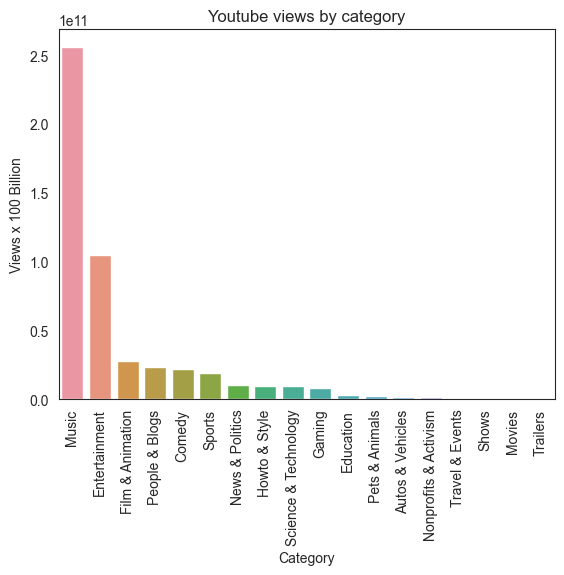

In [64]:
summarised_views = ALL_videos.groupby(['category_id'])['views'].sum()
summarised_views = pd.DataFrame(summarised_views, columns = ['views'])
summarised_views.reset_index(inplace=True)
summarised_views.sort_values(by='views', ascending=False, inplace=True)

sns.set_palette("RdBu")
sns.set_style('white')
sns.barplot(data = summarised_views, x = 'category_id', y = 'views')
plt.xticks(rotation = 90)
plt.title("Youtube views by category")
plt.xlabel("Category")
plt.ylabel("Views x 100 Billion")
plt.show()

From the graph above, we can see that videos in the categories of **Music** and **Entertainment** have by far the most amount of views. As there is a vast amount of views, the scale is unable to display the numbers correctly. It seems that the total amount of views in the **Music** category is around 250 *Billion*, and around 100 *Billion* in the **Entertainment** category. 

We can see this in the actual `summarised_views` table.

In [63]:
summarised_views

,category_id,views
8,Music,255967088943
3,Entertainment,104517467253
4,Film & Animation,27619347901
11,People & Blogs,23600365409
1,Comedy,22050866339
15,Sports,18972425164
9,News & Politics,10422502991
6,Howto & Style,9771031927
13,Science & Technology,9194715151
5,Gaming,7730729502


Seeing these results begs the question: are videos in the **Music** and **Entertainment** categories simply viewed more often, or are the results skewed as there might be many more videos in the **Music** and **Entertainment** categories?

We can try to get an insight by counting the amount of videos per category and see how it compares to the views.

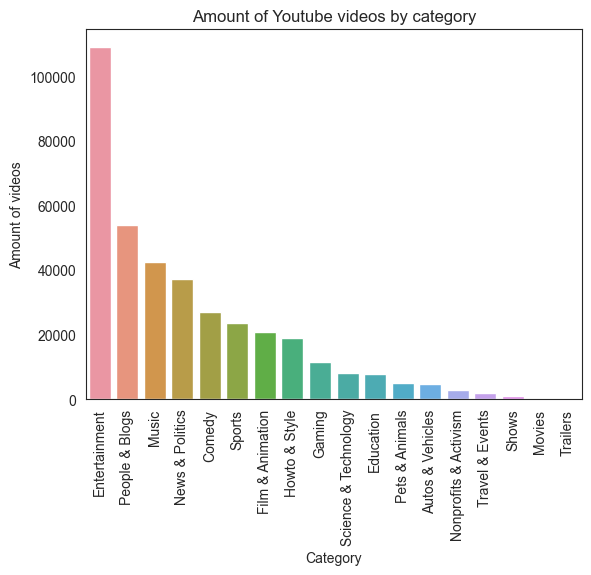

In [76]:
counted_videos = ALL_videos.groupby(['category_id'])['video_id'].count()
counted_videos = pd.DataFrame(counted_videos)
counted_videos.reset_index(inplace=True)
counted_videos.sort_values(by='video_id', ascending=False, inplace=True)
counted_videos

sns.set_palette("RdBu")
sns.set_style('white')
sns.barplot(data = counted_videos, x = 'category_id', y = 'video_id')
plt.xticks(rotation = 90)
plt.title("Amount of Youtube videos by category")
plt.xlabel("Category")
plt.ylabel("Amount of videos")
plt.show()

In [77]:
counted_videos

,category_id,video_id
3,Entertainment,109006
11,People & Blogs,54052
8,Music,42514
9,News & Politics,37288
1,Comedy,26970
15,Sports,23684
4,Film & Animation,20932
6,Howto & Style,18856
5,Gaming,11498
13,Science & Technology,8171


If we count the amount of videos per category, and compare it to the views, we can see that the graph looks quite a bit different. Videos in the **Entertainment** category are the most numerous in this case, followed by **People & Blogs** and **Music**. 

Therefore, looking back at the previous graphs, it can be reasoned that videos in the **Music** category are indeed very popular.

Another way to look at this question, could be by using a weighted average, in which we use a calculation to make all categories have the same weight, meaning that we could show the average amount of views for 1 video in each category.

In [122]:
grouped_data = ALL_videos.groupby('category_id')

# Calculate the weighted average views per category
weighted_average_views = grouped_data['views'].apply(lambda x: (x * x.index).sum() / x.sum())

weighted_average_views = round(weighted_average_views),0
#weighted_average_views = np.array(weighted_average_views,dtype = object)
#weighted_average_views = pd.DataFrame(weighted_average_views, columns = ['views'])
#weighted_average_views = weighted_average_views.to_frame()
#weighted_average_views.reset_index(inplace=True)
#weighted_average_views.sort_values(by='views', ascending=False, inplace=True)
weighted_average_views

(category_id
 Autos & Vehicles         17446.0
 Comedy                   20203.0
 Education                22632.0
 Entertainment            21245.0
 Film & Animation         23641.0
 Gaming                   24838.0
 Howto & Style            21994.0
 Movies                   36253.0
 Music                    26122.0
 News & Politics          22372.0
 Nonprofits & Activism    18813.0
 People & Blogs           21200.0
 Pets & Animals           22892.0
 Science & Technology     22396.0
 Shows                    22980.0
 Sports                   21984.0
 Trailers                 22580.0
 Travel & Events          19355.0
 Name: views, dtype: float64,
 0)

We can see that the weighted average of views for videos in the category **Movies** are actually the highest, followed by **Music**.

As we consistently see that videos in the category **Music** tend to rank quite high in terms of views, it might be curious to see where so many of these views are coming from. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Korea'),
  Text(7, 0, 'Mexico'),
  Text(8, 0, 'Russia'),
  Text(9, 0, 'Unites States')])

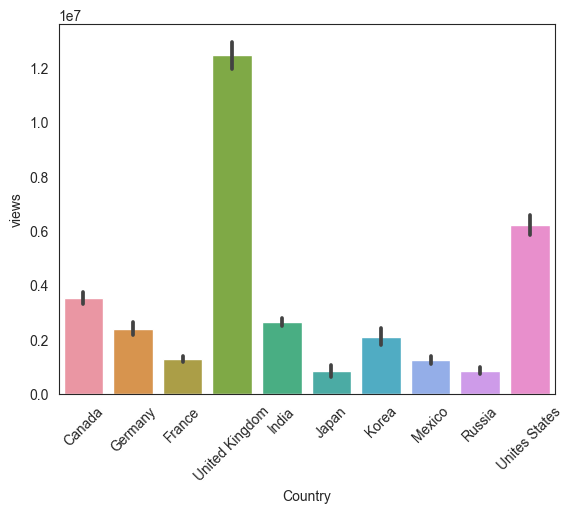

In [126]:
MUSIC_videos = ALL_videos.loc[(ALL_videos['category_id'] == 'Music')]
#sns.scatterplot(data=MUSIC_videos, x="likes", y="views", hue="Country")
sns.barplot(data=MUSIC_videos, x="Country", y="views")
plt.xticks(rotation = 45)

As it turns out, the most amount of views for music videos comes from the UK, followed by the United States. This is quite an interesting result, as Youtube is an American company, and many popular music artists hail from the US. At first I theorised that the data could be biased because of the amount of data available, however the dataset for trending Youtube videos in the US is actually larger than that of the UK. Therefore I have no idea why almost double the amount of views come from the UK, but with more domain understanding I could possibly find out.

It is also curious to see which channels tend to have the highest amounts of views overall.

In [135]:
MUSIC_videos_channels = MUSIC_videos.groupby(['channel_title'])['views'].sum()
#MUSIC_videos_channels.sort_values(by='views', ascending=False, inplace=True)
MUSIC_videos_channels = pd.DataFrame(MUSIC_videos_channels, columns = ['views'])
MUSIC_videos_channels.reset_index(inplace=True)
MUSIC_videos_channels.sort_values(by='views', ascending=False, inplace=True)
MUSIC_videos_channels.head(20)

,channel_title,views
642,ChildishGambinoVEVO,11016766510
2339,NickyJamTV,9479859505
2432,Ozuna,8623329509
3689,ibighit,8205572221
922,DrakeVEVO,7637228580
366,Bad Bunny,7124207494
269,ArianaGrandeVevo,6202230488
3714,jypentertainment,5802822913
962,Ed Sheeran,5775405574
3147,TaylorSwiftVEVO,5606408128


Taking the top 20 music channels based on viewership, we can see that a lot of the channels in this list are associated with *"VEVO"*, an American multinational video hosting service with the goal being to attract more high-end advertisers.

As money is earned from sponsorships on Youtube on popular videos, would it be more attractive for a music artist to release music videos independently on Youtube, or as part of a video hosting service on Youtube? This is a difficult question to answer, as a collective such as VEVO is able to attract more high-end advertisers and offer more visibility on Youtube for starting artists. However, it is without a doubt that VEVO will take a cut of the revenue from the advertisements, meaning that the profit for the artist might very well be similar as to when music videos are released independently.

<AxesSubplot: >

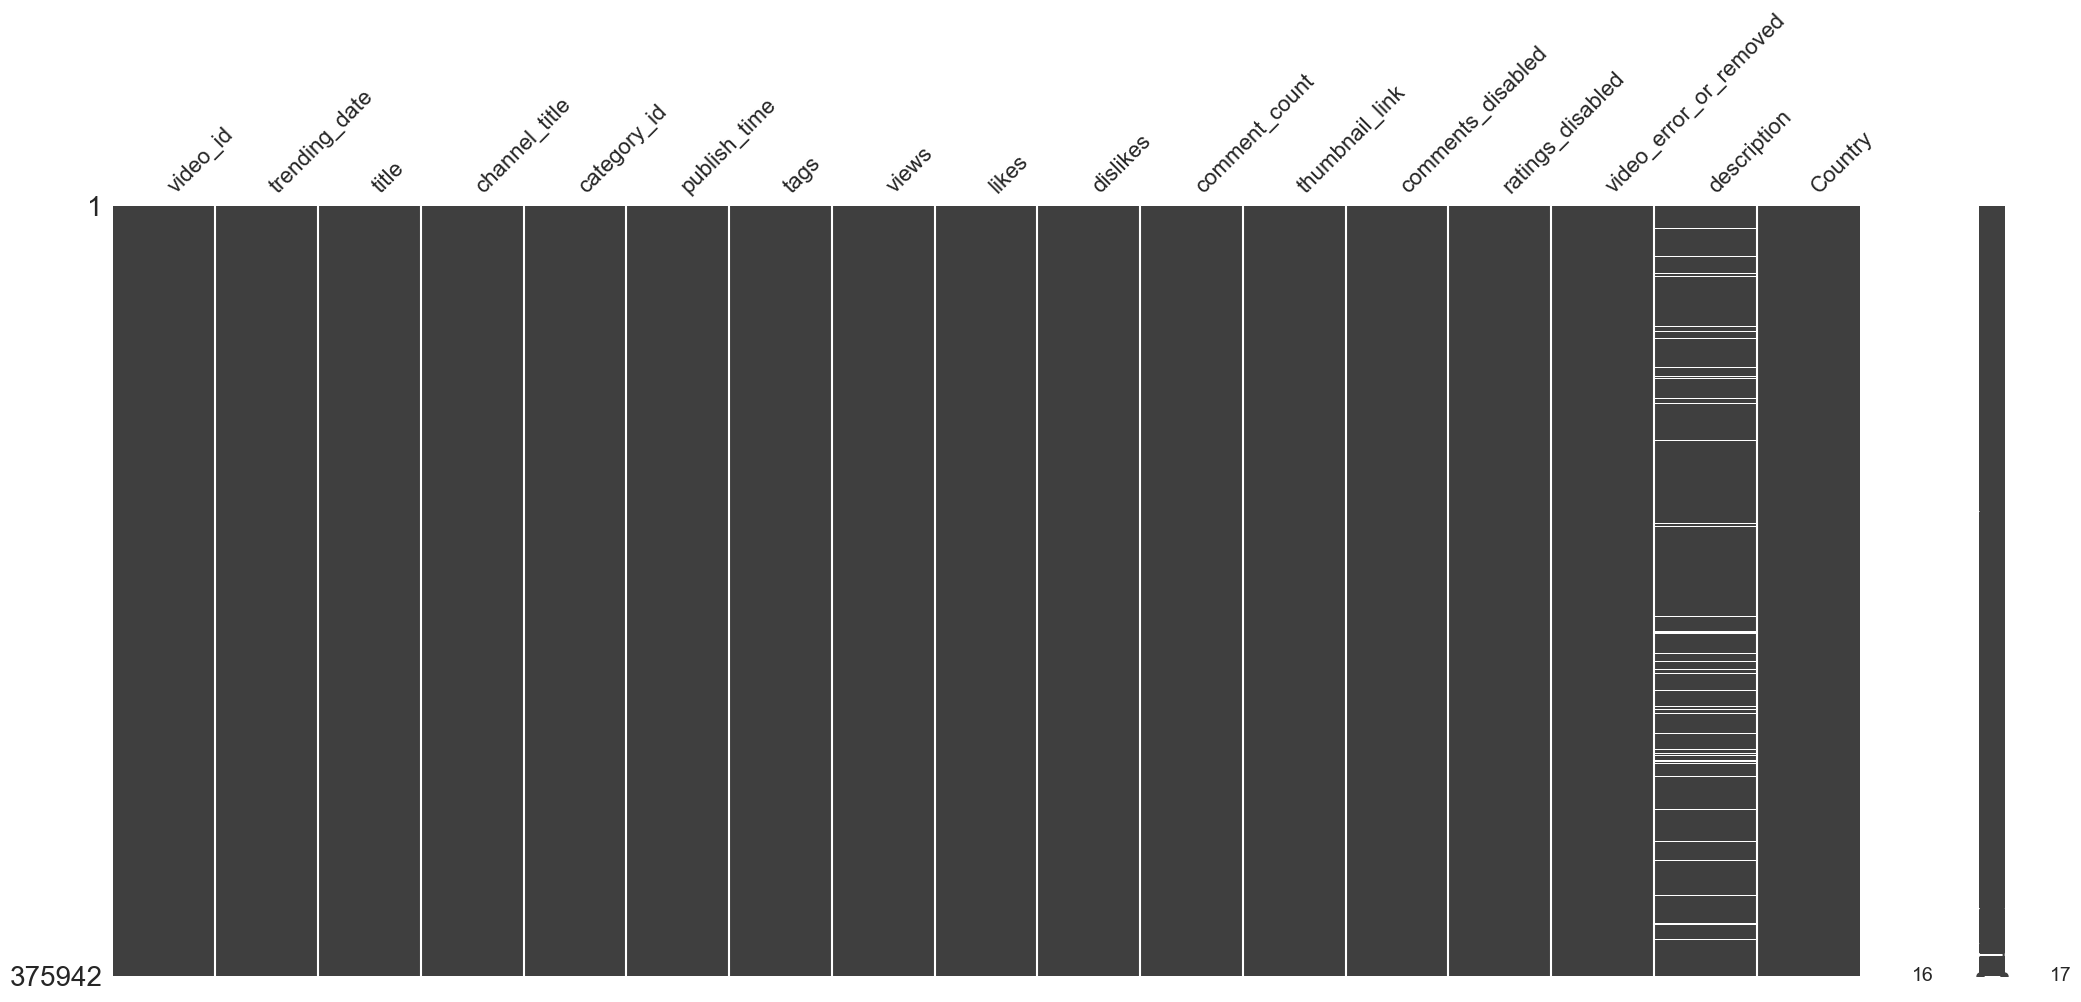

In [132]:
msno.matrix(ALL_videos)

In [16]:
#FILTERED_videos = ALL_videos.loc[(ALL_videos['category_id'] == 'Autos & Vehicles') | (ALL_videos['category_id'] == 'Comedy') | (ALL_videos['category_id'] == 'Education') | (ALL_videos['category_id'] == 'Film & Animation') | (ALL_videos['category_id'] == 'Gaming') | (ALL_videos['category_id'] == 'Howto & Style') | (ALL_videos['category_id'] == 'News & Politics') | (ALL_videos['category_id'] == 'Nonprofits & Activism') | (ALL_videos['category_id'] == 'People & Blogs') | (ALL_videos['category_id'] == 'Pets & Animals') | (ALL_videos['category_id'] == 'Science & Technology') | (ALL_videos['category_id'] == 'Sports') | (ALL_videos['category_id'] == 'Travel & Events')]
#FILTERED_videos.groupby(['category_id']).sum()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
Autos & Vehicles,1661853766,45461895,2571460,5957385,73,75,2
Comedy,22050866339,1081392644,40698333,110064836,158,257,3
Education,2734841410,117479047,3710565,13547175,324,182,0
Film & Animation,27619347901,589885590,25279207,65387125,536,519,85
Gaming,7730729502,298337663,19534374,48853951,208,130,2
Howto & Style,9771031927,347338295,12756984,49180936,169,150,3
News & Politics,10422502991,163503422,28778398,45391130,1921,1547,13
Nonprofits & Activism,1219859213,93538593,24670453,26902565,254,283,1
People & Blogs,23600365409,692550961,56634003,100889458,1090,1433,7


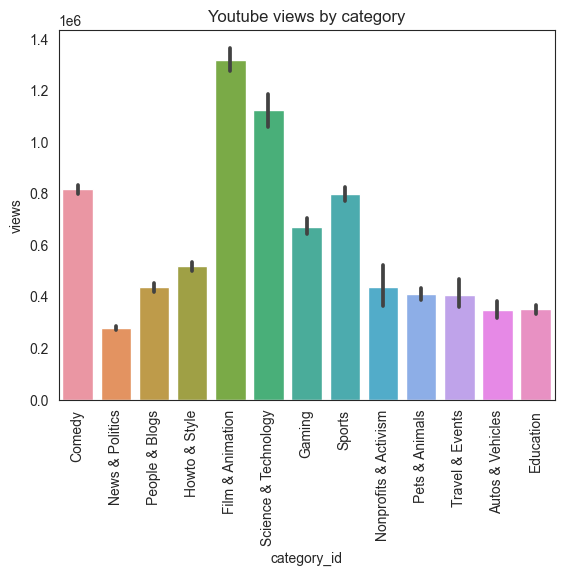

In [17]:
sns.set_palette("RdBu")
sns.set_style('white')
sns.barplot(data = FILTERED_videos, x = 'category_id', y = 'views')
plt.xticks(rotation = 90)
plt.title("Youtube views by category")
plt.show()

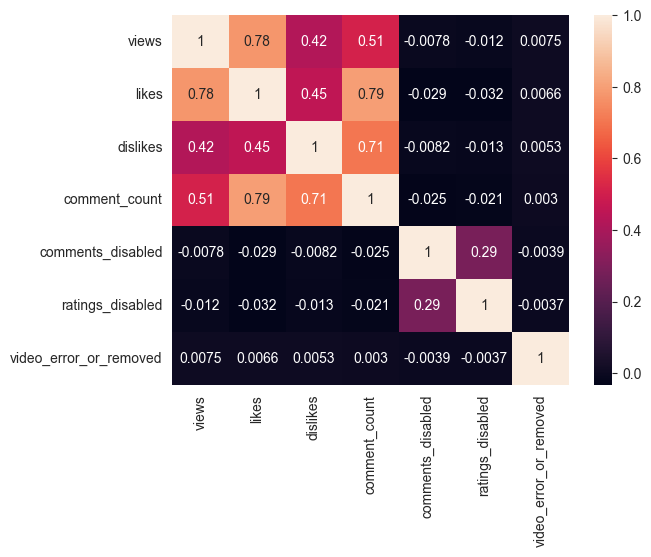

In [23]:
sns.heatmap(ALL_videos.corr(),annot=True);

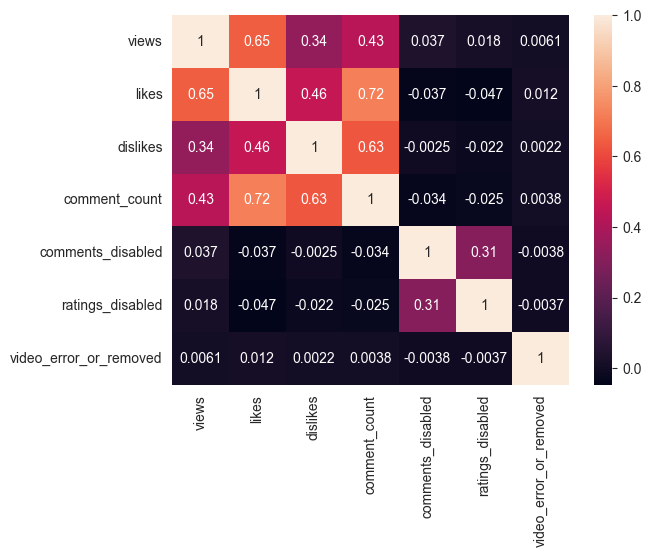

In [24]:
sns.heatmap(FILTERED_videos.corr(),annot=True);